# Learning Gate 

### Reto: Análisis para abrir una sucursal de comida rápida en México

## Data Science Fundamentals - Data Geovisualizacion

### Importing Libraries

In [1]:
import os, glob, requests
import pyproj
import geopandas as gpd
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display_html 

%matplotlib inline

### Loading Data

**2.	Carga los datos de los Estados de la República Mexicana en un GeoDataFrame**

In [2]:
path = os.path.join(os.getcwd(), 'mexican-states-master')
files = glob.glob(os.path.join(path, '*.shp'))

gdf_mex = gpd.read_file(files[0])
display(gdf_mex.head(2))

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."


**3.	Carga los datos de la localización de las sucursales de Costco® en un DataFrame**

In [3]:
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))

# Creando los dataframes
df_cost   = gpd.read_file(files[0])
display(df_cost.head(5))

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del NiÃ±o Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,None
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,None,None
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,None
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691,None
4,5,"""Mixcoac""",Blvd. Adolfo LÃ³pez Mateos 1181,Alvaro ObregÃ³n,19.38723675,-99.19071826,,None


- *Standarizations of Column Names*

In [4]:
for case in [df_cost, gdf_mex]:
    new_cols = {}
    for col in case.columns:
        new_cols[col] = col.strip().replace(' ', '_')
        case.rename(columns=new_cols, inplace=True)
del case

**4.	Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal** 

In [5]:
gdf_cost = gpd.GeoDataFrame(df_cost, geometry = gpd.points_from_xy(x = df_cost.longitud, 
                                                                   y = df_cost.latitud))
display(gdf_cost.head(5))

,id,nombre,direccion,ubicacion,latitud,longitud,tel_centro_llantero,geometry
0,1,"""Puebla""",Blvd. del NiÃ±o Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,None,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691,POINT (-99.13006 19.48170)
4,5,"""Mixcoac""",Blvd. Adolfo LÃ³pez Mateos 1181,Alvaro ObregÃ³n,19.38723675,-99.19071826,,POINT (-99.19072 19.38724)


**5.	Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:**

In [6]:
Regions = '''Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México, Hidalgo, ciudad de méxico, méxico
Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato, Querétaro, michoacán de ocampo
Noreste: Chihuahua, Coahuila, coahuila de zaragoza, Nuevo León, Tamaulipas, Durango
Noroeste: Baja California Norte, Baja California Sur, Sonora, Sinaloa, Baja California
Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán, Quintana Roo, veracruz de ignacio de la llave'''

Regiones = {}
Inv_Regiones = {}
for region in Regions.split('\n'):
    Regiones[region.split(':')[0]] = [reg.lstrip().lower() for reg in region.split(':')[1].split(',')]

    reg = region.split(':')[0]
    for state in [reg.lstrip().lower() for reg in region.split(':')[1].split(',')]:
        Inv_Regiones[state] = reg

gdf_mex['region'] = gdf_mex.name.str.lower().str.lstrip().map(Inv_Regiones)
gdf_mex = gdf_mex[['ISO3166-2', 'name', 'geometry', 'region']]

display(gdf_mex.sample(3))

,ISO3166-2,name,geometry,region
31,MX-ROO,Quintana Roo,"MULTIPOLYGON (((-87.53514 21.48570, -87.53516 ...",Sureste
30,MX-YUC,Yucatán,"MULTIPOLYGON (((-87.53511 21.47936, -87.53278 ...",Sureste
12,MX-MIC,Michoacán de Ocampo,"POLYGON ((-102.57186 19.51119, -102.57416 19.5...",Centro Oeste


**6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia**

In [7]:
gdf_cost = gdf_cost.set_crs(gdf_mex.crs)
gdf_mex = gdf_mex.to_crs(epsg=3395)
gdf_cost = gdf_cost.to_crs(epsg=3395)

- *Plotting costo stores locations within Mexico*

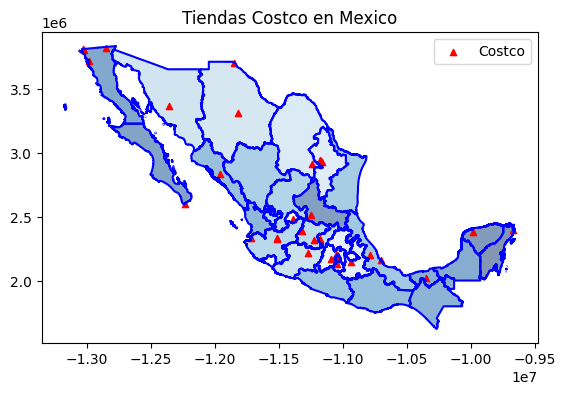

In [8]:
ax = gdf_mex.boundary.plot(color='blue')
ax.set_title('Tiendas Costco en Mexico');
ax.set_aspect('equal')
gdf_mex.plot(ax=ax, alpha=.5, cmap='Blues');
gdf_cost.plot(ax=ax, marker='^', color='r', markersize=20, label='Costco');
ax.legend();

**7.	Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal**

In [9]:
gdf_cost_buffer = gdf_cost.copy()
gdf_cost_buffer.geometry = gdf_cost_buffer.buffer(120000)

**8.	Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales**

- *Plotting Mexicos Regions*

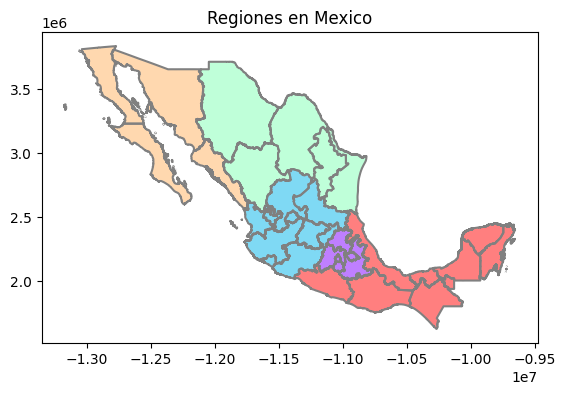

In [10]:
gdf_regiones = gdf_mex.dissolve(by='region').copy()

ax = gdf_mex.boundary.plot(color='grey', zorder=2)
ax.set_title('Regiones en Mexico');
ax.set_aspect('equal')
gdf_regiones.plot(ax=ax, alpha=0.5, cmap='rainbow', markersize=20, zorder=1);

- *Cobertura de tiendas costo en Mexico*

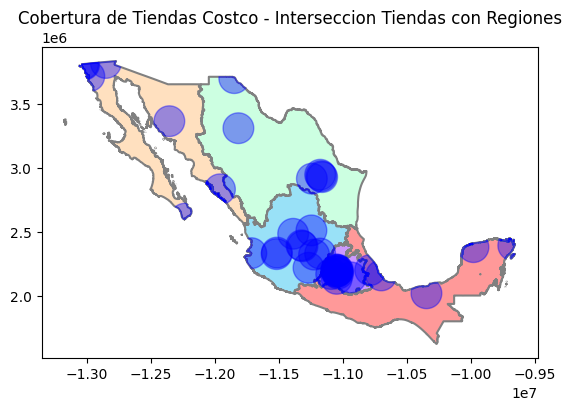

In [11]:
coverage_needed = gpd.overlay(gdf_regiones, gdf_cost_buffer, how='intersection')

ax = gdf_regiones.plot(zorder=0, cmap='rainbow', alpha=.4)#, cmap='tab20c');
gdf_regiones.boundary.plot(ax=ax, color='grey', zorder=1, cmap='cool');
coverage_needed.plot(ax=ax, alpha=.4, edgecolor='blue', color='blue', zorder=2);
ax.set_title('Cobertura de Tiendas Costco - Interseccion Tiendas con Regiones');

**9.	Identifica las regiones en donde se requiere más cobertura y responde la pregunta: ¿En qué regiones del país (Centro, Centro Oeste, Noreste, Noroeste, Sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?**

- *Finding relevant insights*

In [12]:
covered_regions = gpd.overlay(gdf_regiones, gdf_cost_buffer, how='symmetric_difference')
gdf_regiones['covered_area'] = [100*(1-covered/region) for (covered, region) in zip(covered_regions.area, gdf_regiones.area)]
df_regions = pd.DataFrame({'Area_Cubierta [%]':gdf_regiones.covered_area.tolist()}, index=gdf_regiones.index.tolist()).T
df_regions.update(df_regions[df_regions.columns].applymap('{:,.2f}'.format))

C:\Users\alfde\AppData\Local\Temp\ipykernel_22964\1619798365.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  covered_regions = gpd.overlay(gdf_regiones, gdf_cost_buffer, how='symmetric_difference')


- *Plotting found results*

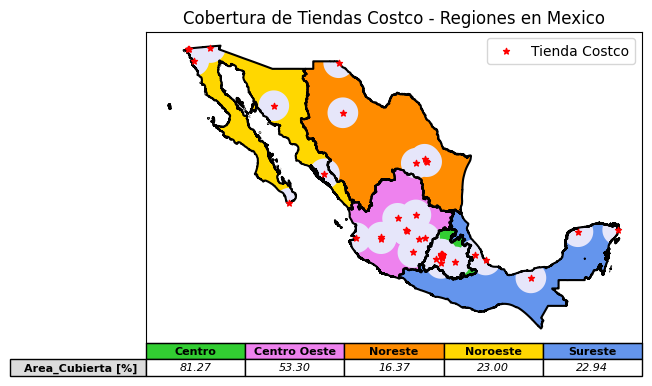

In [13]:
colors = ['limegreen', 'violet', 'darkorange', 'gold', 'cornflowerblue']
ax = gdf_regiones.plot(zorder=0, color=colors, alpha=1)#, cmap='tab20c');
coverage_needed.plot(ax=ax, alpha=1, edgecolor=None, color='lavender', zorder=0);
gdf_regiones.boundary.plot(ax=ax, color='black', zorder=1, cmap='cool');
gdf_cost.plot(ax=ax, marker='*', color='r', markersize=20, zorder=2, label='Tienda Costco');
ax.set_title('Cobertura de Tiendas Costco - Regiones en Mexico')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('')
ax.set_yticks([])
table = ax.table(cellText=df_regions.values,colLabels=df_regions.columns, rowLabels=df_regions.index, fontsize=12,rowColours='y');

counter = 0
for (row,col), cell in table.get_celld().items():
    if (row == 1) & (col == -1):
        cell.set_text_props(weight='bold', horizontalalignment='left');
        cell.set_facecolor('gainsboro')
    elif (row == 0):
        cell.set_text_props(weight='bold');
        cell.set_facecolor(colors[counter])
        counter += 1
    else:
        cell.set_text_props(style='italic', horizontalalignment='center');

ax.legend();

### Conclusion

Se puede observar que las regiones en México con mayor cobertura son el Centro y Centro Oeste, mientras que el resto de las regiones presentan una cobertura muy limitada. Es necesario una investigación más exhaustiva para determinar los factores que pueden estar relacionadas con el área de cobertura en cada una de las regiones presentadas.

Por lo tanto, para la abertura de nuevas sucursales de comida rapida, no es recomendable abrirlas en aquellas regiones con poca cobertura por parte de Costo, como son el Norte y sur del pais. No obstante, es viable abrir sucursales en dichas regiones, pero deben estar ubicadas cerca las capitales de los estados que componen a las regiones analizadas, estados con mayor actvidad economica dentro de sus respecitivas regiones.

# FIN